# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd

data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}

student_data = pd.DataFrame(data)


Draw a dispersion diagram (scatter plot) for the data.

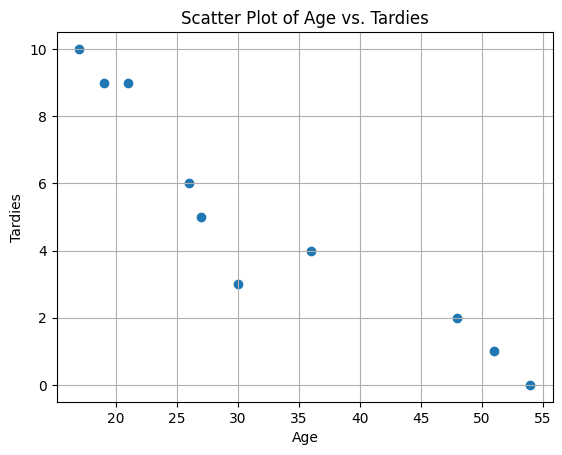

In [3]:
# Your code here.
import matplotlib.pyplot as plt

age = student_data['Age']
tardies = student_data['Tardies']

# scatter plot
plt.figure()
plt.scatter(age, tardies)
plt.title('Scatter Plot of Age vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
- As the age of students increases, the number of tardies decreases
- It seems that the younger students tend to be late more often compared to older students


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
# correlation:
correlation_matrix = student_data[['Age', 'Tardies']].corr()

# covariance 
covariance_matrix = student_data[['Age', 'Tardies']].cov()

print(correlation_matrix)
print(covariance_matrix)

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


# The correlation between Age and Tardies is negative, which mean negative linear relationship. This means that as students' age increases, the number of tardies tends to decrease.
# The covariance is also negative, supporting the negative relationship

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
# I am using linear regression because I am exploring the linear relationship between 'Age' and 'Tardies'.

from sklearn.linear_model import LinearRegression

X = student_data[['Age']]  
y = student_data['Tardies'] 

model = LinearRegression()

# Fitting the model to the data
model.fit(X, y)

# My predictions
predictions = model.predict(X)

print("Intercept:", model.intercept_)
print("Coefficient for Age:", model.coef_[0])

ModuleNotFoundError: No module named 'sklearn'

In [6]:
pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 5.7 MB/s eta 0:00:02
     --                                       0.6/9.2 MB 5.8 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 8.9 MB/s eta 0:00:01
     --------                                 1.9/9.2 MB 10.0 MB/s eta 0:00:01
     ----------                               2.5/9.2 MB 10.5 MB/s eta 0:00:01
     -------------                            3.1/9.2 MB 11.2 MB/s eta 0:00:01
     ----------------                         3.7/9.2 MB 11.4 MB/s eta 0:00:01
     ------------------                       4.3/9.2 MB 11.5 MB/s eta 0:00:01
     --------------------                     4.7/9.2 MB 11.1 MB/s eta 0:00:01
     -----------------------                  5.3/9.2 MB 11.4 MB/s eta 0:00:01
     -------------------------                5.9/9.2 MB 11.4 MB/s eta 0:00:01
     ----------------------------             6.6/9.2 MB 11.7 M


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\minhl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from sklearn.linear_model import LinearRegression

X = student_data[['Age']]  
y = student_data['Tardies'] 

model = LinearRegression()

# Fitting the model to the data
model.fit(X, y)

# My predictions
predictions = model.predict(X)

print("Intercept:", model.intercept_)
print("Coefficient for Age:", model.coef_[0])

Intercept: 12.888803363135771
Coefficient for Age: -0.2428207709159809


Plot your regression model on your scatter plot.

In [ ]:
# Your code here.

plt.figure()
plt.scatter(X, y, label='Data')
plt.plot(X, predictions, label='Regression Line')
plt.title('Linear Regression: Age vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.grid(True)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# The coefficient -0.2428.. means that as one-year increase in age is associated with a decrease of approximately 0.2428 tardies.
# The intercept of 12.888.. means that when the 'Age' of a student is zero, the model predicts that they would have approximately 12.89 tardies. which doesnt make sense in this case


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [1]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [2]:
# Your response here. 
data = pd.read_csv('vehicles.csv')

In [3]:
data

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [4]:
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

# a DataFrame with only the selected variables
selected_data = data[selected_variables]

# See the the corr
correlations = selected_data.corr()

correlations


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [5]:
# the highest corr to CO2 Emission
most_important_variable = correlations['CO2 Emission Grams/Mile'].idxmax()

# the lowest corr to CO2 Emission
least_important_variable = correlations['CO2 Emission Grams/Mile'].idxmin()

most_important_variable


'Combined MPG'

In [6]:
least_important_variable

'Combined MPG'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here. 
# Using multiple linear regression since there are multiple variables

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = selected_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = selected_data['CO2 Emission Grams/Mile']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a linear regression model
model = LinearRegression()

model.fit(X_train, y_train)

# predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse


289.82774408137783

In [10]:
r2

0.9794542628636334

In [ ]:
# I splitted the data into training and testing sets
# I created a multiple linear regressionmodel 
# Then I fit the model to the training data.
# Then I made predictions on the test data and then calculated model performance metrics
# I am predicting CO2 Emission Grams/Mile based on various vehicle characteristics

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# Your response here. 
# the coefficients for each feature
coefficients = dict(zip(X.columns, model.coef_))
print("Coefficients:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef}")

Coefficients:
Year: -0.3155867545879126
Cylinders: 1.7940263231035138
Fuel Barrels/Year: 19.231027286739906
Combined MPG: -2.933573199591574
Fuel Cost/Year: 0.031971450640956744


In [13]:
intercept = model.intercept_
print(f"Intercept: {intercept}")

Intercept: 755.6935073143679


In [ ]:
# Year: This suggests that for every year increase in a vehicle's manufacturing year, the CO2 emissions tend to decrease by 0.316.. grams per mile
# Cylinders: 1.794.. indicates that for each additional cylinder in a vehicle's engine, the CO2 emissions increase by 1.794.. grams per mile
# Fuel Barrels/Year : 19.231.. suggests that for every additional fuel barrel consumed per year by a vehicle, the CO2 emissions tend to increase by 19.231.. grams per mile
# Combined MPG: -2.9336 indicates that for every one-unit increase in combined miles per gallon (MPG) of a vehicle, the CO2 emissions tend to decrease by 2.934.. grams per mile
# Fuel Cost/Year: 0.0319 suggests that for every one-dollar increase in annual fuel cost for a vehicle, the CO2 emissions tend to increase by approximately 0.032 grams per mile

# The intercept is 755.69.. This means that when all other independent variables (Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year) are set to zero, the estimated CO2 Emission Grams/Mile for a vehicle is approximately 755.69 grams per mile.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here.
import pandas as pd

data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)

print(df)


    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [15]:
# Your code here.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


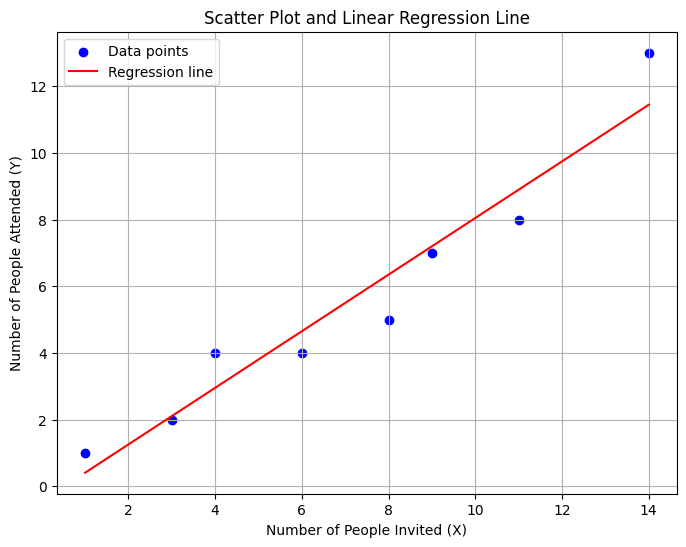

In [18]:

X = df['X']
Y = df['Y']

# a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Data points', color='blue')

# a linear regression model
reg = LinearRegression().fit(X.values.reshape(-1, 1), Y)

# Predict Y values based on the regression model
Y_pred = reg.predict(X.values.reshape(-1, 1))

# Plot the regression line
plt.plot(X, Y_pred, label='Regression line', color='red')

plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot and Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
# Your response here. 

# The scatter plot suggests a as more people are invited, more people tend to attend
# The regression line also supports this positive relationship
# However, the data points are not totally aligned with the regression line

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [20]:
# Your response here. 
# I have asked around abt this problem, but still dont understand totally. 

In [22]:
# I remove data points that fall outside a certain range defined by the mean and standard deviation

x_mean = df['X'].mean()
x_std = df['X'].std()
y_mean = df['Y'].mean()
y_std = df['Y'].std()

In [23]:
# The I define a threshold as a multiple of the standard deviation
# I chose 2 because a threshold of 2 standard deviations would capture the central 95% of the data
# but I dont know if it is always like that? how do we get the right threshold?
threshold = 2

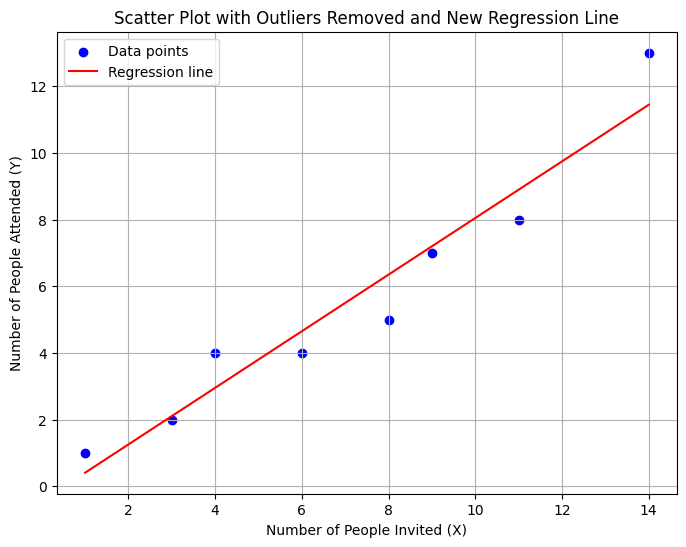

In [24]:
# a new df with outliers removed
df_no_outliers = df[(df['X'] >= x_mean - threshold * x_std) & (df['X'] <= x_mean + threshold * x_std) & (df['Y'] >= y_mean - threshold * y_std) & (df['Y'] <= y_mean + threshold * y_std)]

# Extract X and Y 
X = df_no_outliers['X']
Y = df_no_outliers['Y']

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Data points', color='blue')

# Fit a linear regression model to the cleaned data
reg = LinearRegression().fit(X.values.reshape(-1, 1), Y)

# Predict Y based on the new regression model
Y_pred = reg.predict(X.values.reshape(-1, 1))


plt.plot(X, Y_pred, label='Regression line', color='red')

plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot with Outliers Removed and New Regression Line')
plt.legend()
plt.grid(True)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# I dont see any difference